In [1]:
import numpy as np
import figurefirst as fifi
import matplotlib as mpl

In [2]:
# Plotting parameters
basefs=9
mpl.rcParams["mathtext.fontset"]    = "cm"
mpl.rcParams["font.size"]           = basefs
mpl.rcParams["axes.labelsize"]      = basefs+2
mpl.rcParams["xtick.labelsize"]     = basefs-2
mpl.rcParams["ytick.labelsize"]     = basefs-2
mpl.rcParams["legend.fontsize"]     = basefs-1.5
mpl.rcParams["legend.edgecolor"]    = "black" ;
mpl.rcParams["legend.fancybox"]     = True
mpl.rcParams["legend.borderpad"]    = 0.5
mpl.rcParams["legend.handlelength"] = .75
mpl.rcParams["lines.linewidth"]     = 2
mpl.rcParams["lines.markersize"]    = 2
mpl.rcParams["text.usetex"] = False
mpl.rcParams["text.latex.preamble"] = "\\usepackage{amsmath,amsthm}; \\usepackage{physics}";

{'ismplfigure': False}


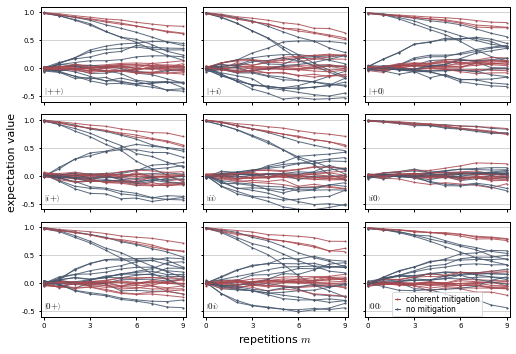

In [3]:
filename = "mitigation_layout" 

layout = fifi.svg_to_axes.FigureLayout(
                                       filename + ".svg",
                                       autogenlayers=True, 
                                       make_mplfigures=True, hide_layers=[]
                                      )

exp_mit = np.load('exp_mit.npy')
exp_unmit = np.load('exp_unmit.npy')

repetitions = np.array(range(0, 10, 1))  # repetitions of 3 * [CX-CX]

col_1 ='#44546A'
col_2 = '#A84A51'
col_3 = '#96738E'

text_l = [r'$\ket{++}$', r'$\ket{+i}$', r'$\ket{+0}$', r'$\ket{i+}$', r'$\ket{ii}$', r'$\ket{i0}$', r'$\ket{0+}$', r'$\ket{0i}$', r'$\ket{00}$']
text_l = [r'$\left|\!+\!\!+\!\right>$', r'$\left|\!+\!i\right>$', r'$\left|\!+\!0\right>$', r'$\left|i\!+\!\right>$', r'$\left|ii\right>$', r'$\left|i0\right>$', r'$\left|0\!+\!\right>$', r'$\left|0i\right>$', r'$\left|00\right>$']
ms = 1
lw = 1
style = '-'

y_off = 0
x_off = 0

for idn in range(9):
    ax = layout.axes[("fig", str(idn+1))]

    ax["axis"].set_facecolor('white')
    ax["axis"].set_ylim((-0.6 + y_off, 1.1 + y_off))
    ax["axis"].set_xlim((-0.2 + x_off, 9.2 + x_off))
    
    #ax["axis"].axhline(y=1.1 + y_off, color='black', linewidth=lw, zorder=5)
    #ax["axis"].axhline(y=-0.6 + y_off, color='black', linewidth=lw, zorder=6)
    #ax["axis"].axvline(x=-0.2 + x_off, color='black', linewidth=lw, zorder=7)
    #ax["axis"].axvline(x=9.2 + x_off, color='black', linewidth=lw, zorder=8)
    ax["axis"].axhline(y=1 + y_off, color='lightgray', linewidth=lw, zorder=1)
    ax["axis"].axhline(y=0.5 + y_off, color='lightgray', linewidth=lw, zorder=1)
    ax["axis"].axhline(y=0.0 + y_off, color='lightgray', linewidth=lw, zorder=1)
    ax["axis"].axhline(y=-0.5 + y_off, color='lightgray', linewidth=lw, zorder=1)
    
    if (idn%3) == 0:
        ax["axis"].set_yticks(np.array([-0.5, 0.0, 0.5, 1.0]) + y_off)
        ax["axis"].set_yticklabels(['-0.5', '0.0', '0.5', '1.0'])
        if idn == 3: ax["axis"].set_ylabel('expectation value')
            
    else:
        ax["axis"].set_yticks(np.array([-0.5, 0.0, 0.5, 1.0]) + y_off)
        ax["axis"].set_yticklabels([])
        
    if idn > 5:
        ax["axis"].set_xticks([0 + x_off, 3 + x_off, 6 + x_off, 9 + x_off])
        if idn==7: ax["axis"].set_xlabel('repetitions $m$')
        
    else:
        ax["axis"].set_xticks([0 + x_off, 3 + x_off, 6 + x_off, 9 + x_off])
        ax["axis"].set_xticklabels([])
        
    fifi.mpl_functions.adjust_spines(ax["axis"], ["left","bottom","top","right"],
                                 spine_locations={"left":0.0,"bottom":0.0,"top":0.0,"right":0.0},
                                 linewidth=1, tick_length=2.5, direction="out", smart_bounds=False); 
        
    for i in range(1, 16):
        if i == 1or i == 4 or i == 5: col = col_1
        elif i == 0: col = col_3
        else: col = col_2
        ax["axis"].plot(repetitions + x_off, exp_unmit[idn, :, i] + y_off, c=col_1, marker='o', markersize=0, linewidth=lw, alpha=0.85, ls=style)
        ax["axis"].plot(repetitions + x_off, exp_mit[idn, :, i] + y_off, c=col_2, marker='o', markersize=0, linewidth=lw, alpha=0.85, ls=style)
        ax["axis"].plot(repetitions + x_off, exp_unmit[idn, :, i] + y_off, c=col_1, marker='D', markersize=ms, linewidth=0, alpha=1, ls=style)
        ax["axis"].plot(repetitions + x_off, exp_mit[idn, :, i] + y_off, c=col_2, marker='o', markersize=ms, linewidth=0, alpha=1, ls=style)
    ax["axis"].text(0, -0.45, text_l[idn])

ax["axis"].plot([90,100], [90,100], c=col_2, marker='o', markersize=ms, alpha=1, ls=style, linewidth=lw, label= r'coherent mitigation')
ax["axis"].plot([90,100], [90,100], c=col_1, marker='D', markersize=ms, alpha=1, ls=style, linewidth=lw, label= r'no mitigation')
ax["axis"].legend(loc='lower center', borderpad=0.3, columnspacing= 0.5, labelspacing=0.2, ncol=1, borderaxespad= 0.1, edgecolor='lightgray', frameon=True, markerfirst=True)

tmp = layout.save("c.svg");